# AI Lab Project: Rubik's Cube Solver

# Cube simulator

First of all, we need to create a simple Rubik's Cube to be able to simulate its behaviour correctly.

A Rubik's Cube has 6 faces with 9 cells each.
We'll use a multidimensional numpy array for this purpose.

In total, it's possible to perform 12 action on the cube.
In fact, you can pick a face and rotate it clockwise or counterclockwise ($=6*2=12$):

1.  U: Rotate the Upper (top) face clockwise
2.  U': Rotate the Upper face counterclockwise
3.  D: Rotate the Down (bottom) face clockwise
4.  D': Rotate the Down face counterclockwise
5.  L: Rotate the Left face clockwise
6.  L': Rotate the Left face counterclockwise
7.  R: Rotate the Right face clockwise
8.  R': Rotate the Right face counterclockwise
9.  F: Rotate the Front (front-facing) face clockwise
10. F': Rotate the Front face counterclockwise
11. B: Rotate the Back (rear-facing) face clockwise
12. B': Rotate the Back face counterclockwise

No other moves are possible, so the number of possible moves is $∑ = 12$.

---

Colors are represented as an integer $[0-5]$

---

**Order of the faces**

This specification is necessary for the correct behaviour of the rotation of rows/columns adjacent to the face to rotate.

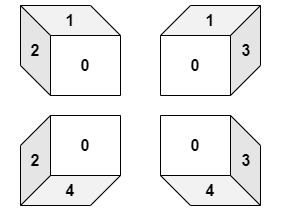

Of course, the rear one is the number *5*.

In [ ]:
import numpy as np

class Cube:
  def __init__(self, faces=None):
    self._solved_faces = None
    if faces is None:
      self.reset()
    else:
      self.faces = faces

  '''
  Reset the cube to a state where each face is filled with the same color (solved state).
  '''
  def reset(self):
    # Repeat each index 9 times
    #   (9 cells on a single face, all filled with the same int = color)
    # Then, reshape as a cube with 6 faces, where each is a grid 3x3
    self.faces = np.repeat(np.arange(6), 9).reshape((6,3,3))

  ## Actions ##

  def perform_action(self, action):
    if action == "F":
        self.face0_clock()
    elif action == "F'":
        self.face0_counterclock()
    elif action == "R":
        self.face3_clock()
    elif action == "R'":
        self.face3_counterclock()
    elif action == "U":
        self.face1_clock()
    elif action == "U'":
        self.face1_counterclock()
    elif action == "B":
        self.face5_clock()
    elif action == "B'":
        self.face5_counterclock()
    elif action == "L":
        self.face2_clock()
    elif action == "L'":
        self.face2_counterclock()
    elif action == "D":
        self.face4_clock()
    elif action == "D'":
        self.face4_counterclock()
    else:
        pass # raise Exception(f'Unknown cube action: {action}')

  def face0_clock(self):
    # Rotate the current face
    self.faces[0,:,:] = np.rot90(self.faces[0,:,:], k=-1)

    # Adjust adjacent faces, swapping the rows.
    # Numbers represent the moved face, letters the side;
    #   B = bottom row, T = top row, L = left column, R = right column.
    # Note: index order is (row, column)

    # 0 -> 1b,3l,4t,2r
    self.faces[1, 2, :], self.faces[3, :, 0], self.faces[4, 0, :], self.faces[2, :, 2] = (
      np.flip(self.faces[2, :, 2].copy()),
      self.faces[1, 2, :].copy(),
      np.flip(self.faces[3, :, 0].copy()),
      self.faces[4, 0, :].copy(),  
    )

  def face0_counterclock(self):
    # Rotate the current face
    self.faces[0,:,:] = np.rot90(self.faces[0,:,:], k=1)

    # Adjust adjacent faces, swapping the rows.
    # Numbers represent the moved face, letters the side;
    #   B = bottom row, T = top row, L = left column, R = right column.
    # Note: index order is (row, column)

    # 0 -> 1b,3l,4t,2r
    self.faces[1, 2, :], self.faces[3, :, 0], self.faces[4, 0, :], self.faces[2, :, 2] = (
      self.faces[3, :, 0].copy(),
      np.flip(self.faces[4, 0, :].copy()),
      self.faces[2, :, 2].copy(),
      np.flip(self.faces[1, 2, :].copy()),
    )

  def face1_clock(self):
    # Rotate the current face
    self.faces[1,:,:] = np.rot90(self.faces[1,:,:], k=-1)

    # Adjust adjacent faces, swapping the rows.
    # Numbers represent the moved face, letters the side;
    #   B = bottom row, T = top row, L = left column, R = right column.
    # Note: index order is (row, column)

    # 1 -> 0t,2t,5t,3t
    self.faces[0, 0, :], self.faces[2, 0, :], self.faces[5, 0, :], self.faces[3, 0, :] = (
      self.faces[3, 0, :].copy(),
      self.faces[0, 0, :].copy(),
      self.faces[2, 0, :].copy(),
      self.faces[5, 0, :].copy(),
    )

  def face1_counterclock(self):
    # Rotate the current face
    self.faces[1,:,:] = np.rot90(self.faces[1,:,:], k=1)

    # Adjust adjacent faces, swapping the rows.
    # Numbers represent the moved face, letters the side;
    #   B = bottom row, T = top row, L = left column, R = right column.
    # Note: index order is (row, column)

    # 1 -> 0t,2t,5t,3t
    self.faces[0, 0, :], self.faces[2, 0, :], self.faces[5, 0, :], self.faces[3, 0, :] = (
      self.faces[2, 0, :].copy(),
      self.faces[5, 0, :].copy(),
      self.faces[3, 0, :].copy(),
      self.faces[0, 0, :].copy(),  
    )

  def face2_clock(self):
    # Rotate the current face
    self.faces[2,:,:] = np.rot90(self.faces[2,:,:], k=-1)

    # Adjust adjacent faces, swapping the rows.
    # Numbers represent the moved face, letters the side;
    #   B = bottom row, T = top row, L = left column, R = right column.
    # Note: index order is (row, column)

    # 2 -> 0l,4l,5r,1l
    self.faces[0, :, 0], self.faces[4, :, 0], self.faces[5, :, 2], self.faces[1, :, 0] = (
      self.faces[1, :, 0].copy(),
      self.faces[0, :, 0].copy(), 
      np.flip(self.faces[4, :, 0].copy()),
      np.flip(self.faces[5, :, 2].copy()),
    )

  def face2_counterclock(self):
    # Rotate the current face
    self.faces[2,:,:] = np.rot90(self.faces[2,:,:], k=1)

    # Adjust adjacent faces, swapping the rows.
    # Numbers represent the moved face, letters the side;
    #   B = bottom row, T = top row, L = left column, R = right column.
    # Note: index order is (row, column)

    # 2 -> 0l,4l,5r,1l
    self.faces[0, :, 0], self.faces[4, :, 0], self.faces[5, :, 2], self.faces[1, :, 0] = (
      self.faces[4, :, 0].copy(),
      np.flip(self.faces[5, :, 2].copy()),
      np.flip(self.faces[1, :, 0].copy()),
      self.faces[0, :, 0].copy(),  
    )

  def face3_clock(self):
    # Rotate the current face
    self.faces[3,:,:] = np.rot90(self.faces[3,:,:], k=-1)

    # Adjust adjacent faces, swapping the rows.
    # Numbers represent the moved face, letters the side;
    #   B = bottom row, T = top row, L = left column, R = right column.
    # Note: index order is (row, column)

    # 3 -> 0r,1r,5l,4r
    self.faces[0, :, 2], self.faces[1, :, 2], self.faces[5, :, 0], self.faces[4, :, 2] = (
      self.faces[4, :, 2].copy(),
      self.faces[0, :, 2].copy(),
      np.flip(self.faces[1, :, 2].copy()),
      np.flip(self.faces[5, :, 0].copy()),
    )

  def face3_counterclock(self):
    # Rotate the current face
    self.faces[3,:,:] = np.rot90(self.faces[3,:,:], k=1)

    # Adjust adjacent faces, swapping the rows.
    # Numbers represent the moved face, letters the side;
    #   B = bottom row, T = top row, L = left column, R = right column.
    # Note: index order is (row, column)

    # 3 -> 0r,1r,5l,4r
    self.faces[0, :, 2], self.faces[1, :, 2], self.faces[5, :, 0], self.faces[4, :, 2] = (
      self.faces[1, :, 2].copy(),
      np.flip(self.faces[5, :, 0].copy()),
      np.flip(self.faces[4, :, 2].copy()),
      self.faces[0, :, 2].copy(),
    )

  def face4_clock(self):
    # Rotate the current face
    self.faces[4,:,:] = np.rot90(self.faces[4,:,:], k=-1)

    # Adjust adjacent faces, swapping the rows.
    # Numbers represent the moved face, letters the side;
    #   B = bottom row, T = top row, L = left column, R = right column.
    # Note: index order is (row, column)

    # 4 -> 0b,3b,5b,2b
    self.faces[0, 2, :], self.faces[3, 2, :], self.faces[5, 2, :], self.faces[2, 2, :] = (
      self.faces[2, 2, :].copy(),
      self.faces[0, 2, :].copy(),
      self.faces[3, 2, :].copy(),
      self.faces[5, 2, :].copy(),  
    )

  def face4_counterclock(self):
    # Rotate the current face
    self.faces[4,:,:] = np.rot90(self.faces[4,:,:], k=1)

    # Adjust adjacent faces, swapping the rows.
    # Numbers represent the moved face, letters the side;
    #   B = bottom row, T = top row, L = left column, R = right column.
    # Note: index order is (row, column)

    # 4 -> 0b,3b,5b,2b
    self.faces[0, 2, :], self.faces[3, 2, :], self.faces[5, 2, :], self.faces[2, 2, :] = (
      self.faces[3, 2, :].copy(),
      self.faces[5, 2, :].copy(),
      self.faces[2, 2, :].copy(),
      self.faces[0, 2, :].copy(),  
    )

  def face5_clock(self):
    # Rotate the current face
    self.faces[5,:,:] = np.rot90(self.faces[5,:,:], k=-1)

    # Adjust adjacent faces, swapping the rows.
    # Numbers represent the moved face, letters the side;
    #   B = bottom row, T = top row, L = left column, R = right column.
    # Note: index order is (row, column)

    # 5 -> 1t,2l,4b,3r
    self.faces[1, 0, :], self.faces[2, :, 0], self.faces[4, 2, :], self.faces[3, :, 2] = (
      self.faces[3, :, 2].copy(),
      np.flip(self.faces[1, 0, :].copy()),
      self.faces[2, :, 0].copy(),
      np.flip(self.faces[4, 2, :].copy()),  
    )

  def face5_counterclock(self):
    # Rotate the current face
    self.faces[5,:,:] = np.rot90(self.faces[5,:,:], k=1)

    # Adjust adjacent faces, swapping the rows.
    # Numbers represent the moved face, letters the side;
    #   B = bottom row, T = top row, L = left column, R = right column.
    # Note: index order is (row, column)

    # 5 -> 1t,2l,4b,3r
    self.faces[1, 0, :], self.faces[2, :, 0], self.faces[4, 2, :], self.faces[3, :, 2] = (
      self.faces[2, :, 0].copy(),
      self.faces[4, 2, :].copy(),
      np.flip(self.faces[3, :, 2].copy()),
      self.faces[1, 0, :].copy(),  
    )

  def solved_faces(self):
    # Count how many faces have the same color as the center
    # (the center never moves, so it indicates how many right cells are there)

    if self._solved_faces is None:
        # Create a cube with all the faces solved based on the current centers
        # Save for later, it'll never change because centers cannot move
        self._solved_faces = np.repeat(self.faces[:, 1, 1], 9).reshape((6,3,3))

    # Count how many cells have the right value
    return np.count_nonzero(self._solved_faces == self.faces, axis=(1,2))
  
  def is_solved(self):
    return np.all(self.solved_faces() == 9)

  def solution_percentage(self):
    # Remove 1 because the center is always solved
    return np.mean((self.solved_faces() - 1) / 8)
  
  def _print_cell(self, face, row, col):
    return [
      '\033[42mg',
      '\033[47mw',
      '\033[101mo',
      '\033[41mr',
      '\033[43my',
      '\033[44mb',
    ][self.faces[face, row, col]] + ' \033[0m'

  def __repr__(self):
    return Cube.__str__(self)
  
  def __str__(self):
    cube_image = ''

    # First row = face 1
    for row in range(3):
      cube_image += ' ' * 7
      for col in range(3):
        cube_image += self._print_cell(1, row, col)
      cube_image += '\n'
    cube_image += '\n'
    
    # Second row = faces 2, 0, 3, 5
    for row in range(3):
      for face in (2, 0, 3, 5):
        for col in range(3):
          cube_image += self._print_cell(face, row, col)
        cube_image += ' '
      cube_image += '\n'
    cube_image += '\n'

    # Third row = face 4
    for row in range(3):
      cube_image += ' ' * 7
      for col in range(3):
        cube_image += self._print_cell(4, row, col)
      cube_image += '\n'

    return cube_image

print(Cube())
print('Is solved?', Cube().is_solved())
print('Faces solved:', Cube().solved_faces())
print('Percentage solved:', Cube().solution_percentage())

       w w w 
       w w w 
       w w w 

o o o  g g g  r r r  b b b  
o o o  g g g  r r r  b b b  
o o o  g g g  r r r  b b b  

       y y y 
       y y y 
       y y y 

Is solved? True
Faces solved: [9 9 9 9 9 9]
Percentage solved: 1.0


In [ ]:
cube = Cube()
print(cube)
cube.face0_clock()
print('-'*40)
print(cube)

       w w w 
       w w w 
       w w w 

o o o  g g g  r r r  b b b  
o o o  g g g  r r r  b b b  
o o o  g g g  r r r  b b b  

       y y y 
       y y y 
       y y y 

----------------------------------------
       w w w 
       w w w 
       o o o 

o o y  g g g  w r r  b b b  
o o y  g g g  w r r  b b b  
o o y  g g g  w r r  b b b  

       r r r 
       y y y 
       y y y 



In [ ]:
%timeit cube.perform_action("F")

78.5 µs ± 9.18 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Cube unit tests

In [ ]:
# Colors as numbers
g, w, o, r, y, b = 0, 1, 2, 3, 4, 5
cube_faces = np.array([
    [[w,y,o],
     [b,y,w],
     [r,o,y]],
    [[y,g,o],
     [r,o,r],
     [r,b,w]],
    [[r,b,b],
     [o,b,o],
     [r,g,g]],
    [[g,w,w],
     [g,g,r],
     [o,b,y]],
    [[y,w,g],
     [r,r,w],
     [g,y,o]],
    [[b,o,b],
     [y,w,y],
     [b,g,w]],
], dtype=np.byte)

actions = ["F", "F'", "R", "R'", "U", "U'", "B", "B'", "L", "L'", "D", "D'"]

solutions = {
    "F": np.array([[[3, 5, 1],[2, 4, 4],[4, 1, 2]],   [[4, 0, 2],[3, 2, 3],[0, 2, 5]],   [[3, 5, 4],[2, 5, 1],[3, 0, 0]],   [[3, 1, 1],[5, 0, 3],[1, 5, 4]],   [[2, 0, 0],[3, 3, 1],[0, 4, 2]],   [[5, 2, 5],[4, 1, 4],[5, 0, 1]]], dtype=np.byte),
    "F'": np.array([[[2, 1, 4],[4, 4, 2],[1, 5, 3]],   [[4, 0, 2],[3, 2, 3],[0, 0, 2]],   [[3, 5, 1],[2, 5, 5],[3, 0, 3]],   [[0, 1, 1],[1, 0, 3],[4, 5, 4]],   [[5, 2, 0],[3, 3, 1],[0, 4, 2]],   [[5, 2, 5],[4, 1, 4],[5, 0, 1]]], dtype=np.byte),
    "R": np.array([[[1, 4, 0],[5, 4, 1],[3, 2, 2]],   [[4, 0, 2],[3, 2, 1],[3, 5, 4]],   [[3, 5, 5],[2, 5, 2],[3, 0, 0]],   [[2, 0, 0],[5, 0, 1],[4, 3, 1]],   [[4, 1, 5],[3, 3, 4],[0, 4, 5]],   [[1, 2, 5],[3, 1, 4],[2, 0, 1]]], dtype=np.byte),
    "R'": np.array([[[1, 4, 2],[5, 4, 3],[3, 2, 1]],   [[4, 0, 5],[3, 2, 4],[3, 5, 5]],   [[3, 5, 5],[2, 5, 2],[3, 0, 0]],   [[1, 3, 4],[1, 0, 5],[0, 0, 2]],   [[4, 1, 2],[3, 3, 1],[0, 4, 4]],   [[2, 2, 5],[1, 1, 4],[0, 0, 1]]], dtype=np.byte),
    "U": np.array([[[0, 1, 1],[5, 4, 1],[3, 2, 4]],   [[3, 3, 4],[5, 2, 0],[1, 3, 2]],   [[1, 4, 2],[2, 5, 2],[3, 0, 0]],   [[5, 2, 5],[0, 0, 3],[2, 5, 4]],   [[4, 1, 0],[3, 3, 1],[0, 4, 2]],   [[3, 5, 5],[4, 1, 4],[5, 0, 1]]], dtype=np.byte),
    "U'": np.array([[[3, 5, 5],[5, 4, 1],[3, 2, 4]],   [[2, 3, 1],[0, 2, 5],[4, 3, 3]],   [[5, 2, 5],[2, 5, 2],[3, 0, 0]],   [[1, 4, 2],[0, 0, 3],[2, 5, 4]],   [[4, 1, 0],[3, 3, 1],[0, 4, 2]],   [[0, 1, 1],[4, 1, 4],[5, 0, 1]]], dtype=np.byte),
    "L": np.array([[[4, 4, 2],[3, 4, 1],[3, 2, 4]],   [[1, 0, 2],[4, 2, 3],[5, 5, 1]],   [[3, 2, 3],[0, 5, 5],[0, 2, 5]],   [[0, 1, 1],[0, 0, 3],[2, 5, 4]],   [[1, 1, 0],[5, 3, 1],[3, 4, 2]],   [[5, 2, 0],[4, 1, 3],[5, 0, 4]]], dtype=np.byte),
    "L'": np.array([[[4, 4, 2],[3, 4, 1],[0, 2, 4]],   [[1, 0, 2],[5, 2, 3],[3, 5, 1]],   [[5, 2, 0],[5, 5, 0],[3, 2, 3]],   [[0, 1, 1],[0, 0, 3],[2, 5, 4]],   [[1, 1, 0],[4, 3, 1],[5, 4, 2]],   [[5, 2, 3],[4, 1, 3],[5, 0, 4]]], dtype=np.byte),
    "D": np.array([[[1, 4, 2],[5, 4, 1],[3, 0, 0]],   [[4, 0, 2],[3, 2, 3],[3, 5, 1]],   [[3, 5, 5],[2, 5, 2],[5, 0, 1]],   [[0, 1, 1],[0, 0, 3],[3, 2, 4]],   [[0, 3, 4],[4, 3, 1],[2, 1, 0]],   [[5, 2, 5],[4, 1, 4],[2, 5, 4]]], dtype=np.byte),
    "D'": np.array([[[1, 4, 2],[5, 4, 1],[2, 5, 4]],   [[4, 0, 2],[3, 2, 3],[3, 5, 1]],   [[3, 5, 5],[2, 5, 2],[3, 2, 4]],   [[0, 1, 1],[0, 0, 3],[5, 0, 1]],   [[0, 1, 2],[1, 3, 4],[4, 3, 0]],   [[5, 2, 5],[4, 1, 4],[3, 0, 0]]], dtype=np.byte),
    "B": np.array([[[1, 4, 2],[5, 4, 1],[3, 2, 4]],   [[1, 3, 4],[3, 2, 3],[3, 5, 1]],   [[2, 5, 5],[0, 5, 2],[4, 0, 0]],   [[0, 1, 2],[0, 0, 4],[2, 5, 0]],   [[4, 1, 0],[3, 3, 1],[3, 2, 3]],   [[5, 4, 5],[0, 1, 2],[1, 4, 5]]], dtype=np.byte),
    "B'": np.array([[[1, 4, 2],[5, 4, 1],[3, 2, 4]],   [[3, 2, 3],[3, 2, 3],[3, 5, 1]],   [[0, 5, 5],[4, 5, 2],[2, 0, 0]],   [[0, 1, 4],[0, 0, 0],[2, 5, 2]],   [[4, 1, 0],[3, 3, 1],[4, 3, 1]],   [[5, 4, 1],[2, 1, 0],[5, 4, 5]]], dtype=np.byte),
}

for action in actions:
  cube = Cube(cube_faces.copy())
  cube.perform_action(action)
  if not np.array_equiv(cube.faces, solutions[action]):
    print('Error performing action', action)
    print('Actual result')
    print(cube)
    print('-'*40)
    print('Expected result')
    print(Cube(solutions[action]))
    raise Exception(f'Test {action} failed')

print('Unit tests ended successfully')

Unit tests ended successfully


### Real cubes
We take a cube and a known way of solving it, performing the actions.

If the final cube is not solved $⇒$ we know for sure that some actions are badly-coded. The inverse ($⟸$) cannot be said, but we hope it's right.

---

Also, it's interesting to notice how the percentage of solved cube actually varies during the moves.

That's useful to better understand later the **reward** mechanism.

In [ ]:
import matplotlib.pyplot as plt

def test_cube(cube_faces, moves, speedtest=False):
  cube = Cube()

  cube.faces = np.array(cube_faces, dtype=np.byte)
  assert cube.faces.shape == (6,3,3), f'Wrong cube shape: {cube.faces.shape}'

  if not speedtest:
    print(cube)

  solution_percentages, solved_faces = [], []

  for move in moves.split():
    cube.perform_action(move)
    if speedtest:
      continue
    solution_percentages.append(cube.solution_percentage())
    solved_faces.append(np.count_nonzero(cube.solved_faces() == 9))

  assert cube.is_solved()

  if not speedtest:
    plt.plot(
        list(range(len(solution_percentages))), # x
        solution_percentages, # y
        label="Solution progress",
    )
    plt.plot(
        list(range(len(solved_faces))), # x
        solved_faces, # y
        label="Number of solved cube faces",
        drawstyle='steps-post',
    )
    plt.legend()

       o g r 
       r o y 
       r w o 

y b w  g g y  g r g  y r b  
g g o  b w r  w b o  g y y  
y w w  b w w  g b b  w o b  

       r b o 
       o r y 
       r y o 



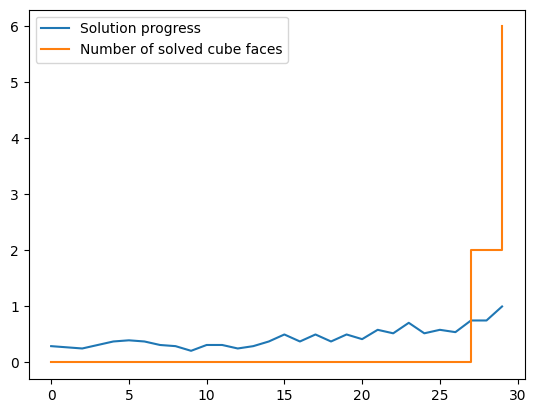

In [ ]:
# https://rubikscu.be/solver/?cube=0234426412651332611336514511343152355645366125452246462
test_cube([
    # All faces, in order
    [[g, g, y],
     [b, w, r],
     [b, w, w]],
    [[o, g, r],
     [r, o, y],
     [r, w, o]],
    [[y, b, w],
     [g, g, o],
     [y, w, w]],
    [[g, r, g],
     [w, b, o],
     [g, b, b]],
    [[r, b, o],
     [o, r, y],
     [r, y, o]],
    [[y, r, b],
     [g, y, y],
     [w, o, b]],
], "U R' U F U' D D R R B B D' F' L' F' U F F B B U U F F B B L L B B")

       b w w 
       w y g 
       y b g 

o r b  r o r  w o r  b b y  
g r r  b g g  y o w  o b r  
w w r  y b o  w r o  g o b  

       g y g 
       g w y 
       o y y 



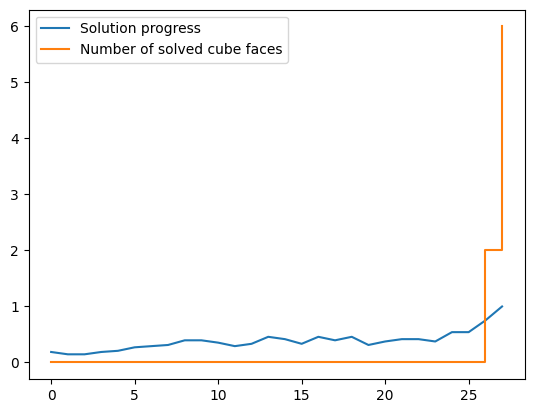

In [ ]:
# https://rubikscu.be/solver/?cube=0511163653245344114424533652124621142556254325363316266
test_cube([
    [[r,o,r],
     [b,g,g],
     [y,b,o]],
    [[b,w,w],
     [w,y,g],
     [y,b,g]],
    [[o,r,b],
     [g,r,r],
     [w,w,r]],
    [[w,o,r],
     [y,o,w],
     [w,r,o]],
    [[g,y,g],
     [g,w,y],
     [o,y,y]],
    [[b,b,y],
     [o,b,r],
     [g,o,b]],
], "U F' L' F' R R U' F' U' D' B R R B' U B B U U R R D D R R F F U")

Let's perform a little speedtest

In [ ]:
cube, moves = [
    [[r,o,r],
     [b,g,g],
     [y,b,o]],
    [[b,w,w],
     [w,y,g],
     [y,b,g]],
    [[o,r,b],
     [g,r,r],
     [w,w,r]],
    [[w,o,r],
     [y,o,w],
     [w,r,o]],
    [[g,y,g],
     [g,w,y],
     [o,y,y]],
    [[b,b,y],
     [o,b,r],
     [g,o,b]],
], "U F' L' F' R R U' F' U' D' B R R B' U B B U U R R D D R R F F U"

print(f'Speedtest with {len(moves.split())} moves')
%timeit test_cube(cube, moves, speedtest=True)

Speedtest with 28 moves
1.49 ms ± 396 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Cube in C

We can see this cube implementation is quite slow.

It's also possible to integrate C code in Python using `ctypes`.

---

Also the encoding for a single cube cell is different but transparent to the user.

All the details are directly documented into code.

In [ ]:
%%file cube.c

#include <string.h>
#include <stdlib.h>
#include <stdint.h>
#include <stdbool.h>

#define T_CUBE_FACE uint32_t
#define T_CUBE T_CUBE_FACE*
#define T_CUBE_CELL uint8_t

/*
 * A cube is represented as 6 uint32_t,
 * each for every face of the cube.
 *
 * We need to encode 6 colors, so 3 bits each are enough
 * but we have 9 cells for each face.
 * That adds up to 3*9 = 27 bits, so we use uint32_t
 * for each face.
 * That being said, a cube is an array of 6 uint32_t.
 */

#define GET_CUBE(face, row, col) \
    (((face) >> 3*((row)*3+(col))) & 0b111)

#define SET_CUBE(face, row, col, v) \
    (face) = ((v)&0b111) << 3*((row)*3+(col)) | ((face) & (0xFFFFFFFF ^ (0b111 << 3*((row)*3+(col)))))

void reset_cube(T_CUBE cube);

T_CUBE_FACE* create_cube() {
    // Remember to free the cube!
    T_CUBE_FACE* cube = malloc(6 * sizeof(T_CUBE_FACE));
    reset_cube(cube);
    return cube;
}

T_CUBE_FACE* create_cube_from(uint8_t* flatten_faces) {
    T_CUBE_FACE* cube = malloc(6 * sizeof(T_CUBE_FACE));

    // Zero out the cube
    memset(cube, 0, 6 * sizeof(T_CUBE_FACE));

    // Copy the faces into the cube
    for (uint8_t face = 0; face < 6; face++) {
        for (uint8_t row = 0; row < 3; row++) {
            for (uint8_t col = 0; col < 3; col++) {
                uint8_t i = face*9 + row*3 + col;
                SET_CUBE(cube[face], row, col, flatten_faces[i]);
            }
        }
    }

    return cube;
}

void reset_cube(T_CUBE cube) {
    for (T_CUBE_CELL face = 0; face < 6; face++) {
        for (T_CUBE_CELL row = 0; row < 3; row++) {
            for (T_CUBE_CELL col = 0; col < 3; col++) {
                SET_CUBE(cube[face], row, col, face);
            }
        }
    }
}

void rotate_clock(T_CUBE cube, uint8_t face) {
    // Step 1: Transpose the matrix
    for (uint8_t i = 0; i < 3; i++) {
        for (uint8_t j = i + 1; j < 3; j++) {
            T_CUBE_CELL temp = GET_CUBE(cube[face], i, j);
            SET_CUBE(cube[face], i, j, GET_CUBE(cube[face], j, i));
            SET_CUBE(cube[face], j, i, temp);
        }
    }

    // Step 2: Reverse the rows of the transposed matrix
    for (uint8_t i = 0; i < 3; i++) {
        for (uint8_t j = 0; j < 2; j++) {
            T_CUBE_CELL temp = GET_CUBE(cube[face], i, j);
            SET_CUBE(cube[face], i, j, GET_CUBE(cube[face], i, 2-j));
            SET_CUBE(cube[face], i, 2-j, temp);
        }
    }
}

void rotate_counterclock(T_CUBE cube, uint8_t face) {
    // Step 1: Transpose the matrix
    for (uint8_t i = 0; i < 3; i++) {
        for (uint8_t j = i + 1; j < 3; j++) {
            T_CUBE_CELL temp = GET_CUBE(cube[face], i, j);
            SET_CUBE(cube[face], i, j, GET_CUBE(cube[face], j, i));
            SET_CUBE(cube[face], j, i, temp);
        }
    }

    // Step 2: Reverse the columns of the transposed matrix
    for (uint8_t i = 0; i < 3; i++) {
        for (uint8_t j = 0; j < 2; j++) {
            T_CUBE_CELL temp = GET_CUBE(cube[face], j, i);
            SET_CUBE(cube[face], j, i, GET_CUBE(cube[face], 2-j, i));
            SET_CUBE(cube[face], 2-j, i, temp);
        }
    }
}

void face0_clock(T_CUBE cube) {
    // Rotate current face
    rotate_clock(cube, 0);

    // Adjust adjacent faces, swapping the rows.
    // Numbers represent the moved face, letters the side;
    //      B = bottom row, T = top row, L = left column, R = right column.
    // Note: index order is (row, column)
    
    // 0 -> 1b,3l,4t,2r
    T_CUBE_FACE old[6];
    memcpy(old, cube, sizeof(old));

    for (T_CUBE_CELL i = 0; i < 3; i++) {
        // Perform swaps!
        SET_CUBE(cube[1], 2, i, GET_CUBE(old[2], 2-i, 2));
        SET_CUBE(cube[3], i, 0, GET_CUBE(old[1], 2, i));
        SET_CUBE(cube[4], 0, i, GET_CUBE(old[3], 2-i, 0));
        SET_CUBE(cube[2], i, 2, GET_CUBE(old[4], 0, i));
    }
}

void face0_counterclock(T_CUBE cube) {
    // Rotate current face
    rotate_counterclock(cube, 0);

    // Adjust adjacent faces, swapping the rows.
    // Numbers represent the moved face, letters the side;
    //      B = bottom row, T = top row, L = left column, R = right column.
    // Note: index order is (row, column)
    
    // 0 -> 1b,3l,4t,2r
    T_CUBE_FACE old[6];
    memcpy(old, cube, sizeof(old));

    for (T_CUBE_CELL i = 0; i < 3; i++) {
        // Perform swaps!
        SET_CUBE(cube[1], 2, i, GET_CUBE(old[3], i, 0));
        SET_CUBE(cube[3], i, 0, GET_CUBE(old[4], 0, 2-i));
        SET_CUBE(cube[4], 0, i, GET_CUBE(old[2], i, 2));
        SET_CUBE(cube[2], i, 2, GET_CUBE(old[1], 2, 2-i));
    }
}

void face1_clock(T_CUBE cube) {
    // Same logic as face0_clock, but with different swaps.
    rotate_clock(cube, 1);

    // 1 -> 0t,2t,5t,3t
    T_CUBE_FACE old[6];
    memcpy(old, cube, sizeof(old));

    for (T_CUBE_CELL i = 0; i < 3; i++) {
        // Perform swaps!
        SET_CUBE(cube[0], 0, i, GET_CUBE(old[3], 0, i));
        SET_CUBE(cube[2], 0, i, GET_CUBE(old[0], 0, i));
        SET_CUBE(cube[5], 0, i, GET_CUBE(old[2], 0, i));
        SET_CUBE(cube[3], 0, i, GET_CUBE(old[5], 0, i));
    }
}

void face1_counterclock(T_CUBE cube) {
    // Same logic as face0_counterclock, but with different swaps.
    rotate_counterclock(cube, 1);

    // 1 -> 0t,2t,5t,3t
    T_CUBE_FACE old[6];
    memcpy(old, cube, sizeof(old));

    for (T_CUBE_CELL i = 0; i < 3; i++) {
        // Perform swaps!
        SET_CUBE(cube[0], 0, i, GET_CUBE(old[2], 0, i));
        SET_CUBE(cube[2], 0, i, GET_CUBE(old[5], 0, i));
        SET_CUBE(cube[5], 0, i, GET_CUBE(old[3], 0, i));
        SET_CUBE(cube[3], 0, i, GET_CUBE(old[0], 0, i));
    }
}

void face2_clock(T_CUBE cube) {
    // Same logic as face0_clock, but with different swaps.
    rotate_clock(cube, 2);

    // 2 -> 0l,4l,5r,1l
    T_CUBE_FACE old[6];
    memcpy(old, cube, sizeof(old));

    for (T_CUBE_CELL i = 0; i < 3; i++) {
        // Perform swaps!
        SET_CUBE(cube[0], i, 0, GET_CUBE(old[1], i, 0));
        SET_CUBE(cube[4], i, 0, GET_CUBE(old[0], i, 0));
        SET_CUBE(cube[5], i, 2, GET_CUBE(old[4], 2-i, 0));
        SET_CUBE(cube[1], i, 0, GET_CUBE(old[5], 2-i, 2));
    }
}

void face2_counterclock(T_CUBE cube) {
    // Same logic as face0_counterclock, but with different swaps.
    rotate_counterclock(cube, 2);

    // 2 -> 0l,4l,5r,1l
    T_CUBE_FACE old[6];
    memcpy(old, cube, sizeof(old));

    for (T_CUBE_CELL i = 0; i < 3; i++) {
        // Perform swaps!
        SET_CUBE(cube[0], i, 0, GET_CUBE(old[4], i, 0));
        SET_CUBE(cube[4], i, 0, GET_CUBE(old[5], 2-i, 2));
        SET_CUBE(cube[5], i, 2, GET_CUBE(old[1], 2-i, 0));
        SET_CUBE(cube[1], i, 0, GET_CUBE(old[0], i, 0));
    }
}

void face3_clock(T_CUBE cube) {
    // Same logic as face0_clock, but with different swaps.
    rotate_clock(cube, 3);

    // 3 -> 0r,1r,5l,4r
    T_CUBE_FACE old[6];
    memcpy(old, cube, sizeof(old));

    for (T_CUBE_CELL i = 0; i < 3; i++) {
        // Perform swaps!
        SET_CUBE(cube[0], i, 2, GET_CUBE(old[4], i, 2));
        SET_CUBE(cube[1], i, 2, GET_CUBE(old[0], i, 2));
        SET_CUBE(cube[5], i, 0, GET_CUBE(old[1], 2-i, 2));
        SET_CUBE(cube[4], i, 2, GET_CUBE(old[5], 2-i, 0));
    }
}

void face3_counterclock(T_CUBE cube) {
    // Same logic as face0_counterclock, but with different swaps.
    rotate_counterclock(cube, 3);

    // 3 -> 0r,1r,5l,4r
    T_CUBE_FACE old[6];
    memcpy(old, cube, sizeof(old));

    for (T_CUBE_CELL i = 0; i < 3; i++) {
        // Perform swaps!
        SET_CUBE(cube[0], i, 2, GET_CUBE(old[1], i, 2));
        SET_CUBE(cube[1], i, 2, GET_CUBE(old[5], 2-i, 0));
        SET_CUBE(cube[5], i, 0, GET_CUBE(old[4], 2-i, 2));
        SET_CUBE(cube[4], i, 2, GET_CUBE(old[0], i, 2));
    }
}

void face4_clock(T_CUBE cube) {
    // Same logic as face0_clock, but with different swaps.
    rotate_clock(cube, 4);

    // 4 -> 0b,3b,5b,2b
    T_CUBE_FACE old[6];
    memcpy(old, cube, sizeof(old));

    for (T_CUBE_CELL i = 0; i < 3; i++) {
        // Perform swaps!
        SET_CUBE(cube[0], 2, i, GET_CUBE(old[2], 2, i));
        SET_CUBE(cube[3], 2, i, GET_CUBE(old[0], 2, i));
        SET_CUBE(cube[5], 2, i, GET_CUBE(old[3], 2, i));
        SET_CUBE(cube[2], 2, i, GET_CUBE(old[5], 2, i));
    }
}

void face4_counterclock(T_CUBE cube) {
    // Same logic as face0_counterclock, but with different swaps.
    rotate_counterclock(cube, 4);

    // 4 -> 0b,3b,5b,2b
    T_CUBE_FACE old[6];
    memcpy(old, cube, sizeof(old));

    for (T_CUBE_CELL i = 0; i < 3; i++) {
        // Perform swaps!
        SET_CUBE(cube[0], 2, i, GET_CUBE(old[3], 2, i));
        SET_CUBE(cube[3], 2, i, GET_CUBE(old[5], 2, i));
        SET_CUBE(cube[5], 2, i, GET_CUBE(old[2], 2, i));
        SET_CUBE(cube[2], 2, i, GET_CUBE(old[0], 2, i));
    }
}

void face5_clock(T_CUBE cube) {
    // Same logic as face0_clock, but with different swaps.
    rotate_clock(cube, 5);

    // 5 -> 1t,2l,4b,3r
    T_CUBE_FACE old[6];
    memcpy(old, cube, sizeof(old));

    for (T_CUBE_CELL i = 0; i < 3; i++) {
        // Perform swaps!
        SET_CUBE(cube[1], 0, i, GET_CUBE(old[3], i, 2));
        SET_CUBE(cube[2], i, 0, GET_CUBE(old[1], 0, 2-i));
        SET_CUBE(cube[4], 2, i, GET_CUBE(old[2], i, 0));
        SET_CUBE(cube[3], i, 2, GET_CUBE(old[4], 2, 2-i));
    }
}

void face5_counterclock(T_CUBE cube) {
    // Same logic as face0_counterclock, but with different swaps.
    rotate_counterclock(cube, 5);

    // 5 -> 1t,2l,4b,3r
    T_CUBE_FACE old[6];
    memcpy(old, cube, sizeof(old));

    for (T_CUBE_CELL i = 0; i < 3; i++) {
        // Perform swaps!
        SET_CUBE(cube[1], 0, i, GET_CUBE(old[2], i, 0));
        SET_CUBE(cube[2], i, 0, GET_CUBE(old[4], 2, i));
        SET_CUBE(cube[4], 2, i, GET_CUBE(old[3], 2-i, 2));
        SET_CUBE(cube[3], i, 2, GET_CUBE(old[1], 0, i));
    }
}

void perform_action(T_CUBE cube, char* actions) {
    char* action = strtok(actions, " ");

    while (action != NULL) {
        if (action[1] == '\0') {
            switch (action[0]) {
                case 'F': face0_clock(cube); break;
                case 'R': face3_clock(cube); break;
                case 'U': face1_clock(cube); break;
                case 'B': face5_clock(cube); break;
                case 'L': face2_clock(cube); break;
                case 'D': face4_clock(cube); break;
            }
        } else if (action[1] == '\'') {
            switch (action[0]) {
                case 'F': face0_counterclock(cube); break;
                case 'R': face3_counterclock(cube); break;
                case 'U': face1_counterclock(cube); break;
                case 'B': face5_counterclock(cube); break;
                case 'L': face2_counterclock(cube); break;
                case 'D': face4_counterclock(cube); break;
            }
        }

        action = strtok(NULL, " ");
    }
}

//! Need to free the returned array!
uint8_t* _solved_faces(T_CUBE cube) {
    uint8_t* solved = malloc(6 * sizeof(uint8_t));

    for (uint8_t face = 0; face < 6; face++) {
        T_CUBE_CELL center = GET_CUBE(cube[face], 1, 1);

        solved[face] = 0;

        for (uint8_t row = 0; row < 3; row++) {
            for (uint8_t col = 0; col < 3; col++) {

                //* Count solved faces, excluding the center.
                if ((row != 1 || col != 1) && GET_CUBE(cube[face], row, col) == center) {
                    solved[face]++;
                }

            }
        }
    }

    return solved;
}

uint8_t solved_faces(T_CUBE cube) {
    // Count solved faces (= 8, without the center).
    uint8_t* solved = _solved_faces(cube);
    uint8_t total = 0;

    for (uint8_t face = 0; face < 6; face++) {
        if (solved[face] == 8) {
            total++;
        }
    }

    free(solved);

    return total;
}

bool is_solved(T_CUBE cube) {
    return solved_faces(cube) == 6;
}

double solution_percentage(T_CUBE cube) {
    uint8_t* solved = _solved_faces(cube);
    double total = 0;

    for (uint8_t face = 0; face < 6; face++) {
        total += solved[face] - 1; // Exclude the center, since it's always solved.
    }

    free(solved);

    return total / (6 /*faces*/ * 8 /*cells*/);
}

T_CUBE_CELL get_cell(T_CUBE cube, uint8_t face, uint8_t row, uint8_t col) {
    return GET_CUBE(cube[face], row, col);
}

Overwriting cube.c


In [ ]:
! gcc -shared -O2 -o cube.so cube.c

In [ ]:
import ctypes

# Load the shared library containing the C functions
lib = ctypes.CDLL('./cube.so')

# Define the return types and argument types

cube_type = ctypes.POINTER(ctypes.c_uint32)
faces_type = ctypes.c_uint8 * (6 * 3 * 3)

## create_cube
lib.create_cube.restype = cube_type
lib.create_cube_from.argtypes = [faces_type]
lib.create_cube_from.restype = cube_type

## perform_action
lib.perform_action.argtypes = [cube_type, ctypes.c_char_p]
lib.get_cell.argtypes = [cube_type, ctypes.c_uint8, ctypes.c_uint8, ctypes.c_uint8]
lib.get_cell.restype = ctypes.c_uint8
lib.solved_faces.argtypes = [cube_type]
lib.solved_faces.restype = ctypes.c_uint8

## face rotations
lib.face0_clock.argtypes = [cube_type]
lib.face0_counterclock.argtypes = [cube_type]
lib.face1_clock.argtypes = [cube_type]
lib.face1_counterclock.argtypes = [cube_type]
lib.face2_clock.argtypes = [cube_type]
lib.face2_counterclock.argtypes = [cube_type]
lib.face3_clock.argtypes = [cube_type]
lib.face3_counterclock.argtypes = [cube_type]
lib.face4_clock.argtypes = [cube_type]
lib.face4_counterclock.argtypes = [cube_type]
lib.face5_clock.argtypes = [cube_type]
lib.face5_counterclock.argtypes = [cube_type]

## solution utils
lib.is_solved.argtypes = [cube_type]
lib.is_solved.restype = ctypes.c_bool
lib.solution_percentage.argtypes = [cube_type]
lib.solution_percentage.restype = ctypes.c_double


class Cube:
  def __init__(self, faces=None):
    if faces is None:
      self.cube = lib.create_cube()
    else:
      self.cube = lib.create_cube_from(faces_type(*[
        ctypes.c_uint8(faces[face][row][col])
        for face in range(6)
        for row in range(3)
        for col in range(3)
      ]))

  def __del__(self):
    if hasattr(self, 'cube'):
      lib.free(self.cube)

  def perform_action(self, actions):
    if type(actions) is list:
      actions = str.join(' ', actions)

    lib.perform_action(self.cube, ctypes.c_char_p(actions.encode('utf-8')))

  def face0_clock(self):
    lib.face0_clock(self.cube)

  def face0_counterclock(self):
    lib.face0_counterclock(self.cube)
  
  def face1_clock(self):
    lib.face1_clock(self.cube)

  def face1_counterclock(self):
    lib.face1_counterclock(self.cube)

  def face2_clock(self):
    lib.face2_clock(self.cube)

  def face2_counterclock(self):
    lib.face2_counterclock(self.cube)

  def face3_clock(self):
    lib.face3_clock(self.cube)

  def face3_counterclock(self):
    lib.face3_counterclock(self.cube)

  def face4_clock(self):
    lib.face4_clock(self.cube)

  def face4_counterclock(self):
    lib.face4_counterclock(self.cube)
  
  def face5_clock(self):
    lib.face5_clock(self.cube)

  def face5_counterclock(self):
    lib.face5_counterclock(self.cube)

  def is_solved(self):
    return lib.is_solved(self.cube)

  def solution_percentage(self):
    return lib.solution_percentage(self.cube)

  def get_cell(self, face, row, col):
    return lib.get_cell(self.cube, face, row, col)

  def solved_faces(self):
    return lib.solved_faces(self.cube)

  def _print_cell(self, face, row, col):
    return [
      '\033[42mg',
      '\033[47mw',
      '\033[101mo',
      '\033[41mr',
      '\033[43my',
      '\033[44mb',
    ][self.get_cell(face, row, col)] + ' \033[0m'

  def __repr__(self):
    return Cube.__str__(self)
  
  def __str__(self):
    cube_image = ''

    # First row = face 1
    for row in range(3):
      cube_image += ' ' * 7
      for col in range(3):
        cube_image += self._print_cell(1, row, col)
      cube_image += '\n'
    cube_image += '\n'
    
    # Second row = faces 2, 0, 3, 5
    for row in range(3):
      for face in (2, 0, 3, 5):
        for col in range(3):
          cube_image += self._print_cell(face, row, col)
        cube_image += ' '
      cube_image += '\n'
    cube_image += '\n'

    # Third row = face 4
    for row in range(3):
      cube_image += ' ' * 7
      for col in range(3):
        cube_image += self._print_cell(4, row, col)
      cube_image += '\n'

    return cube_image

  def is_same(self, faces):
    for face in range(6):
      for row in range(3):
        for col in range(3):
          if self.get_cell(face, row, col) != faces[face][row][col]:
            return False
    return True

Now, let's **run the tests again!**

In [ ]:
# Colors as numbers
g, w, o, r, y, b = 0, 1, 2, 3, 4, 5

cube_faces = np.array([
    [[w,y,o],
     [b,y,w],
     [r,o,y]],
    [[y,g,o],
     [r,o,r],
     [r,b,w]],
    [[r,b,b],
     [o,b,o],
     [r,g,g]],
    [[g,w,w],
     [g,g,r],
     [o,b,y]],
    [[y,w,g],
     [r,r,w],
     [g,y,o]],
    [[b,o,b],
     [y,w,y],
     [b,g,w]],
], dtype=np.byte)

actions = ["F", "F'", "R", "R'", "U", "U'", "B", "B'", "L", "L'", "D", "D'"]

solutions = {
    "F": np.array([[[3, 5, 1],[2, 4, 4],[4, 1, 2]],   [[4, 0, 2],[3, 2, 3],[0, 2, 5]],   [[3, 5, 4],[2, 5, 1],[3, 0, 0]],   [[3, 1, 1],[5, 0, 3],[1, 5, 4]],   [[2, 0, 0],[3, 3, 1],[0, 4, 2]],   [[5, 2, 5],[4, 1, 4],[5, 0, 1]]], dtype=np.byte),
    "F'": np.array([[[2, 1, 4],[4, 4, 2],[1, 5, 3]],   [[4, 0, 2],[3, 2, 3],[0, 0, 2]],   [[3, 5, 1],[2, 5, 5],[3, 0, 3]],   [[0, 1, 1],[1, 0, 3],[4, 5, 4]],   [[5, 2, 0],[3, 3, 1],[0, 4, 2]],   [[5, 2, 5],[4, 1, 4],[5, 0, 1]]], dtype=np.byte),
    "R": np.array([[[1, 4, 0],[5, 4, 1],[3, 2, 2]],   [[4, 0, 2],[3, 2, 1],[3, 5, 4]],   [[3, 5, 5],[2, 5, 2],[3, 0, 0]],   [[2, 0, 0],[5, 0, 1],[4, 3, 1]],   [[4, 1, 5],[3, 3, 4],[0, 4, 5]],   [[1, 2, 5],[3, 1, 4],[2, 0, 1]]], dtype=np.byte),
    "R'": np.array([[[1, 4, 2],[5, 4, 3],[3, 2, 1]],   [[4, 0, 5],[3, 2, 4],[3, 5, 5]],   [[3, 5, 5],[2, 5, 2],[3, 0, 0]],   [[1, 3, 4],[1, 0, 5],[0, 0, 2]],   [[4, 1, 2],[3, 3, 1],[0, 4, 4]],   [[2, 2, 5],[1, 1, 4],[0, 0, 1]]], dtype=np.byte),
    "U": np.array([[[0, 1, 1],[5, 4, 1],[3, 2, 4]],   [[3, 3, 4],[5, 2, 0],[1, 3, 2]],   [[1, 4, 2],[2, 5, 2],[3, 0, 0]],   [[5, 2, 5],[0, 0, 3],[2, 5, 4]],   [[4, 1, 0],[3, 3, 1],[0, 4, 2]],   [[3, 5, 5],[4, 1, 4],[5, 0, 1]]], dtype=np.byte),
    "U'": np.array([[[3, 5, 5],[5, 4, 1],[3, 2, 4]],   [[2, 3, 1],[0, 2, 5],[4, 3, 3]],   [[5, 2, 5],[2, 5, 2],[3, 0, 0]],   [[1, 4, 2],[0, 0, 3],[2, 5, 4]],   [[4, 1, 0],[3, 3, 1],[0, 4, 2]],   [[0, 1, 1],[4, 1, 4],[5, 0, 1]]], dtype=np.byte),
    "L": np.array([[[4, 4, 2],[3, 4, 1],[3, 2, 4]],   [[1, 0, 2],[4, 2, 3],[5, 5, 1]],   [[3, 2, 3],[0, 5, 5],[0, 2, 5]],   [[0, 1, 1],[0, 0, 3],[2, 5, 4]],   [[1, 1, 0],[5, 3, 1],[3, 4, 2]],   [[5, 2, 0],[4, 1, 3],[5, 0, 4]]], dtype=np.byte),
    "L'": np.array([[[4, 4, 2],[3, 4, 1],[0, 2, 4]],   [[1, 0, 2],[5, 2, 3],[3, 5, 1]],   [[5, 2, 0],[5, 5, 0],[3, 2, 3]],   [[0, 1, 1],[0, 0, 3],[2, 5, 4]],   [[1, 1, 0],[4, 3, 1],[5, 4, 2]],   [[5, 2, 3],[4, 1, 3],[5, 0, 4]]], dtype=np.byte),
    "D": np.array([[[1, 4, 2],[5, 4, 1],[3, 0, 0]],   [[4, 0, 2],[3, 2, 3],[3, 5, 1]],   [[3, 5, 5],[2, 5, 2],[5, 0, 1]],   [[0, 1, 1],[0, 0, 3],[3, 2, 4]],   [[0, 3, 4],[4, 3, 1],[2, 1, 0]],   [[5, 2, 5],[4, 1, 4],[2, 5, 4]]], dtype=np.byte),
    "D'": np.array([[[1, 4, 2],[5, 4, 1],[2, 5, 4]],   [[4, 0, 2],[3, 2, 3],[3, 5, 1]],   [[3, 5, 5],[2, 5, 2],[3, 2, 4]],   [[0, 1, 1],[0, 0, 3],[5, 0, 1]],   [[0, 1, 2],[1, 3, 4],[4, 3, 0]],   [[5, 2, 5],[4, 1, 4],[3, 0, 0]]], dtype=np.byte),
    "B": np.array([[[1, 4, 2],[5, 4, 1],[3, 2, 4]],   [[1, 3, 4],[3, 2, 3],[3, 5, 1]],   [[2, 5, 5],[0, 5, 2],[4, 0, 0]],   [[0, 1, 2],[0, 0, 4],[2, 5, 0]],   [[4, 1, 0],[3, 3, 1],[3, 2, 3]],   [[5, 4, 5],[0, 1, 2],[1, 4, 5]]], dtype=np.byte),
    "B'": np.array([[[1, 4, 2],[5, 4, 1],[3, 2, 4]],   [[3, 2, 3],[3, 2, 3],[3, 5, 1]],   [[0, 5, 5],[4, 5, 2],[2, 0, 0]],   [[0, 1, 4],[0, 0, 0],[2, 5, 2]],   [[4, 1, 0],[3, 3, 1],[4, 3, 1]],   [[5, 4, 1],[2, 1, 0],[5, 4, 5]]], dtype=np.byte),
}

for action in actions:
  cube = Cube(cube_faces.copy())
  cube.perform_action(action)
  if not cube.is_same(solutions[action]):
    print('Error performing action', action)
    print('Actual result')
    print(cube)
    print('-'*40)
    print('Expected result')
    print(Cube(solutions[action]))
    raise Exception(f'Test {action} failed')

print('Unit tests running single moves ended successfully')

Unit tests running single moves ended successfully


In [ ]:

def test_cube(cube_faces, moves, speedtest=False):
  cube = Cube(cube_faces)

  if not speedtest:
    print('testing cube')
    print(cube)

  solution_percentages, solved_faces = [], []

  for move in moves.split():
    cube.perform_action(move)
    if speedtest:
      continue
    solution_percentages.append(cube.solution_percentage())
    solved_faces.append(cube.solved_faces())

  assert cube.is_solved()

  if not speedtest:
    plt.plot(
        list(range(len(solution_percentages))), # x
        solution_percentages, # y
        label="Solution progress",
    )
    plt.plot(
        list(range(len(solved_faces))), # x
        solved_faces, # y
        label="Number of solved cube faces",
        drawstyle='steps-post',
    )
    plt.legend()

testing cube
       o g r 
       r o y 
       r w o 

y b w  g g y  g r g  y r b  
g g o  b w r  w b o  g y y  
y w w  b w w  g b b  w o b  

       r b o 
       o r y 
       r y o 



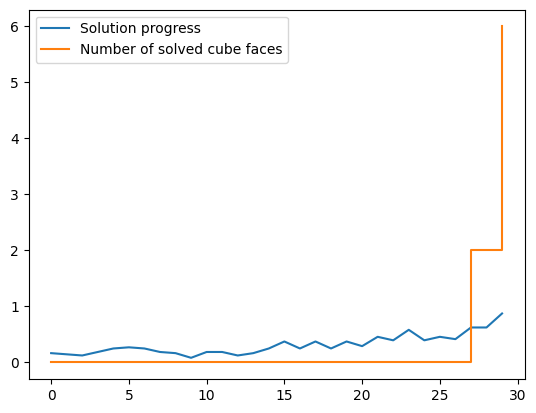

In [ ]:
# Real cubes with moves known to be correct

# https://rubikscu.be/solver/?cube=0234426412651332611336514511343152355645366125452246462
test_cube([
    # All faces, in order
    [[g, g, y],
     [b, w, r],
     [b, w, w]],
    [[o, g, r],
     [r, o, y],
     [r, w, o]],
    [[y, b, w],
     [g, g, o],
     [y, w, w]],
    [[g, r, g],
     [w, b, o],
     [g, b, b]],
    [[r, b, o],
     [o, r, y],
     [r, y, o]],
    [[y, r, b],
     [g, y, y],
     [w, o, b]],
], "U R' U F U' D D R R B B D' F' L' F' U F F B B U U F F B B L L B B")

testing cube
       b w w 
       w y g 
       y b g 

o r b  r o r  w o r  b b y  
g r r  b g g  y o w  o b r  
w w r  y b o  w r o  g o b  

       g y g 
       g w y 
       o y y 



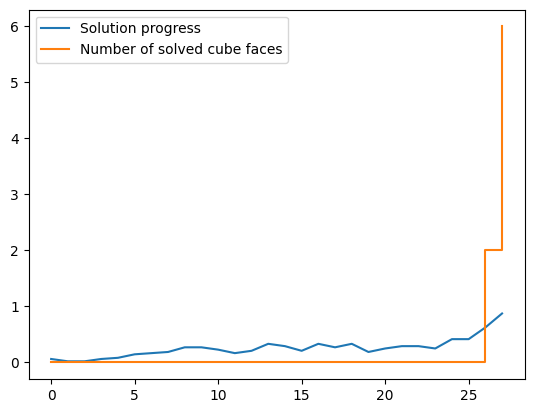

In [ ]:
# https://rubikscu.be/solver/?cube=0511163653245344114424533652124621142556254325363316266
test_cube([
    [[r,o,r],
     [b,g,g],
     [y,b,o]],
    [[b,w,w],
     [w,y,g],
     [y,b,g]],
    [[o,r,b],
     [g,r,r],
     [w,w,r]],
    [[w,o,r],
     [y,o,w],
     [w,r,o]],
    [[g,y,g],
     [g,w,y],
     [o,y,y]],
    [[b,b,y],
     [o,b,r],
     [g,o,b]],
], "U F' L' F' R R U' F' U' D' B R R B' U B B U U R R D D R R F F U")

### C code speedtest

We can see the **enormous** difference in speed with this implementation vs the python (numpy) one.

More than **10x** better!

In [ ]:
cube = Cube()
%timeit cube.face0_clock()

684 ns ± 12.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
# Speedtest performing moves on a real cube

cube, moves = [
    [[r,o,r],
     [b,g,g],
     [y,b,o]],
    [[b,w,w],
     [w,y,g],
     [y,b,g]],
    [[o,r,b],
     [g,r,r],
     [w,w,r]],
    [[w,o,r],
     [y,o,w],
     [w,r,o]],
    [[g,y,g],
     [g,w,y],
     [o,y,y]],
    [[b,b,y],
     [o,b,r],
     [g,o,b]],
], "U F' L' F' R R U' F' U' D' B R R B' U B B U U R R D D R R F F U"

%timeit test_cube(cube, moves, speedtest=True)

92.4 µs ± 30.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
